In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img,img_to_array
folder = '/content/drive/MyDrive/DOCUMENTS/FACE_RECOGNITION/dataSets'
photos, labels = list(), list()
for file in listdir(folder):
  photo = load_img(folder+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  output = int(file.split('_')[1])  #tach lay so id từ ảnh
  photos.append(photo)              
  labels.append(output) 
photos = asarray(photos)            #lưu dữ liệu ảnh dưới dạng mảng
labels = asarray(labels)            #lưu dữ liệu phân loại dạng mảng
class_name = ['LUAN','DUY','TAN']   #tạo tên class tương ứng với dữ liệu phân loại
print(photos.shape, labels.shape, class_name)
save('/content/drive/MyDrive/DOCUMENTS/FACE_RECOGNITION/FILE_NPY/face_ANN_photos.npy',photos)
save('/content/drive/MyDrive/DOCUMENTS/FACE_RECOGNITION/FILE_NPY/face_ANN_labels.npy',labels)

(561, 150, 150, 3) (561,) ['LUAN', 'DUY', 'TAN']


In [5]:
photos = np.load('/content/drive/MyDrive/DOCUMENTS/FACE_RECOGNITION/FILE_NPY/face_ANN_photos.npy')
labels = np.load('/content/drive/MyDrive/DOCUMENTS/FACE_RECOGNITION/FILE_NPY/face_ANN_labels.npy')
class_name = ['LUAN','DUY','TAN'] 

In [4]:
#import thu vien
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from sklearn.preprocessing import scale

In [6]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.25, random_state=5)   #tạo dữ liệu train 75% và test 25%
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(420, 150, 150, 3) (141, 150, 150, 3)
(420,) (141,)


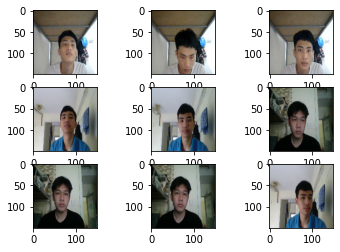

In [7]:
#show 9 ảnh đầu tiên trong tập dữ liệu train        #áo trắng: LUAN, #áo đen: DUY, #áo xanh: TAN
x_train_show = x_train.astype(int)            
import matplotlib.pyplot as plt
from matplotlib.image import imread
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train_show[i])
plt.show()

In [8]:
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [9]:
#tạo model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

In [10]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(3, activation='Softmax'))

In [11]:
#train model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=64,epochs=10,verbose=1,validation_data = (x_test, y_test))
model.save('/content/drive/MyDrive/DOCUMENTS/FACE_RECOGNITION/MODEL_TRAINING/model_face_CNN.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
7/7 [==============================] - 21s 3s/step - loss: 0.6122 - accuracy: 0.8095 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 19s 3s/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 21s 3s/step - loss: 7.3635e-04 - accuracy: 1.0000 - val_loss: 8.7035e-06 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 20s 3s/step - loss: 1.8118e-06 - accuracy: 1.0000 - val_loss: 3.1753e-05 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 19s 3s/step - loss: 4.7967e-08 - accuracy: 1.0000 - val_loss: 7.5121e-05 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 20s 3s/step - loss: 1.0218e-08 - accuracy: 1.0000 - val_loss: 1.1774e-04 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 19s 3s/step - loss: 5.6766e-09 - accuracy: 1.0000 - val_loss: 1.4695e-04 - val_accuracy: 1

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ',score[0])
print('test accuracy: ', score[1])

y_pred = model.predict(x_test)
print(y_pred.flatten())
print(y_test)

Test loss:  1.9149520085193217e-06
test accuracy:  1.0
[1.6606365e-10 1.0000000e+00 1.4278521e-10 9.9999666e-01 2.6722853e-29
 3.3135884e-06 9.9999321e-01 1.5644623e-28 6.8397171e-06 1.7156332e-10
 1.0000000e+00 6.3690397e-10 9.9999321e-01 1.5628160e-28 6.8186419e-06
 5.3533356e-10 2.8339212e-13 1.0000000e+00 9.9999750e-01 6.5761877e-29
 2.5591680e-06 5.9375832e-10 4.4976216e-13 1.0000000e+00 7.0868111e-10
 2.5948852e-12 1.0000000e+00 6.7961853e-10 8.0277625e-13 1.0000000e+00
 9.9999630e-01 1.8787099e-29 3.6777753e-06 1.8474361e-10 1.0000000e+00
 1.5800783e-10 9.8660480e-10 1.0000000e+00 5.7074967e-09 9.9999535e-01
 6.3955228e-29 4.6023692e-06 7.4244458e-11 1.0000000e+00 3.9643838e-10
 1.7048229e-10 1.0000000e+00 6.1070926e-10 9.9999571e-01 9.7252625e-29
 4.2617448e-06 6.6040218e-10 1.6849723e-12 1.0000000e+00 6.5898409e-10
 1.2309282e-13 1.0000000e+00 9.9998903e-01 1.5721373e-28 1.1010451e-05
 5.6044930e-10 1.8990082e-13 1.0000000e+00 6.8096279e-10 6.7686465e-13
 1.0000000e+00 9.99997

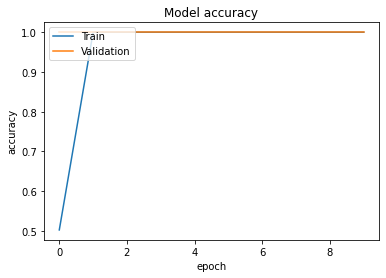

In [ ]:
#ve do thi do chinh xac
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')

[[4.9842882e-08 3.6368706e-09 1.0000000e+00]]
This is TAN


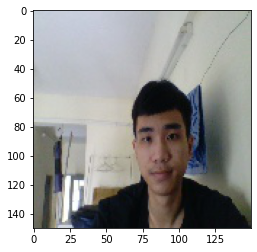

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from google.colab.patches import cv2_imshow

img = load_img('TAN_TEST2.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255.0

a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])

[[2.8096129e-15 1.0000000e+00 2.2112994e-09]]
This is DUY


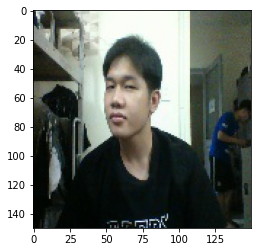

In [ ]:
img = load_img('DUY_TEST1.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255.0

a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])

[[9.7764528e-01 3.5463197e-19 2.2354696e-02]]
This is LUAN


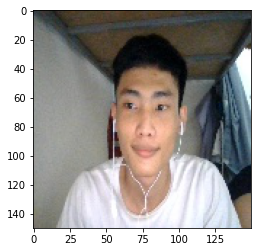

In [ ]:
img = load_img('LUAN_TEST1.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255.0

a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])